In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import Ridge

In [2]:
train = pd.read_csv('C:\\Users\\GAURAV TIWARI\\Desktop\\New folder\\train.csv')
test = pd.read_csv('C:\\Users\\GAURAV TIWARI\\Desktop\\New folder\\test.csv') 

In [3]:
fulldata = [train,test]

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
for dataset in fulldata:
    dataset['ProductCode']= dataset['Product_ID'].apply(lambda x: str(x)[0])
    dataset['ProductId']= dataset['Product_ID'].apply(lambda x: str(x)[1:])

In [6]:
for dataset in fulldata:
    del dataset['Product_ID']

In [7]:
for dataset in fulldata:
    dataset['ProductCode']= dataset['ProductCode'].map({'P': 1}).astype(int)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
ProductCode                   550068 non-null int32
ProductId                     550068 non-null object
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 52.5+ MB


In [10]:
test.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,ProductCode,ProductId
0,1000004,M,46-50,7,B,2,1,1,11.0,NaN,1,00128942
1,1000009,M,26-35,17,C,0,0,3,5.0,NaN,1,00113442
2,1000010,F,36-45,1,B,4+,1,5,14.0,NaN,1,00288442
3,1000010,F,36-45,1,B,4+,1,4,9.0,NaN,1,00145342
4,1000011,F,26-35,1,C,1,0,4,5.0,12.0,1,00053842


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
User_ID                       233599 non-null int64
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
ProductCode                   233599 non-null int32
ProductId                     233599 non-null object
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 20.5+ MB


In [14]:
train.isnull().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
ProductCode                        0
ProductId                          0
dtype: int64

In [15]:
test.isnull().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
ProductCode                        0
ProductId                          0
dtype: int64

In [16]:
train['Gender'].unique()

array(['F', 'M'], dtype=object)

In [17]:
train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [18]:
train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [19]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
train['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [21]:
train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [22]:
train['Product_Category_2'].unique()

array([ nan,   6.,  14.,   2.,   8.,  15.,  16.,  11.,   5.,   3.,   4.,
        12.,   9.,  10.,  17.,  13.,   7.,  18.])

In [23]:
train['Product_Category_3'].unique()

array([ nan,  14.,  17.,   5.,   4.,  16.,  15.,   8.,   9.,  13.,   6.,
        12.,   3.,  18.,  11.,  10.])

In [24]:
for dataset in fulldata:
    dataset['Product_Category_2']= dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median())

In [25]:
for dataset in fulldata:
    dataset['Product_Category_3']= dataset['Product_Category_3'].fillna(dataset['Product_Category_3'].median())

In [26]:
train.isnull().sum()

User_ID                       0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
ProductCode                   0
ProductId                     0
dtype: int64

In [27]:
train.head(n=2)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,ProductCode,ProductId
0,1000001,F,0-17,10,A,2,0,3,9.0,14.0,8370,1,00069042
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200,1,00248942


In [28]:
for dataset in fulldata:
    dataset['Gender']= dataset['Gender'].map({'F':0, 'M':1}).astype(int)

In [29]:
train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [30]:
train['Age'].isnull().sum()

0

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null int32
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
ProductCode                   550068 non-null int32
ProductId                     550068 non-null object
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 50.4+ MB


In [32]:
for dataset in fulldata:
    dataset['Age']= dataset['Age'].map({'0-17': 'A', '18-25':'B', '26-35':'C', '36-45':'D','46-50':'E', '51-55':'F', '55+':'G'})

In [33]:
train['Age'].unique()

array(['A', 'G', 'C', 'E', 'F', 'D', 'B'], dtype=object)

In [34]:
for dataset in fulldata:
    dataset['Age']= dataset['Age'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}).astype(int)

In [35]:
train['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [36]:
for dataset in fulldata:
    dataset['City_Category']= dataset['City_Category'].map({'A':0, 'B':1, 'C':2}).astype(int)

In [37]:
train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [38]:
for dataset in fulldata:
    dataset['Stay_In_Current_City_Years']= dataset['Stay_In_Current_City_Years'].map({'0':'A', '1':'B', '2':'C', '3':'D','4+':'E'})

In [39]:
for dataset in fulldata:
    dataset['Stay_In_Current_City_Years']= dataset['Stay_In_Current_City_Years'].map({'A':0, 'B':1, 'C':2,'D':3,'E':4}).astype(int)

In [40]:
train['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [41]:
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,ProductCode,ProductId
0,1000001,0,0,10,0,2,0,3,9.0,14.0,8370,1,00069042
1,1000001,0,0,10,0,2,0,1,6.0,14.0,15200,1,00248942
2,1000001,0,0,10,0,2,0,12,9.0,14.0,1422,1,00087842
3,1000001,0,0,10,0,2,0,12,14.0,14.0,1057,1,00085442
4,1000002,1,6,16,2,4,0,8,9.0,14.0,7969,1,00285442


In [42]:
test.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,ProductCode,ProductId
0,1000004,1,4,7,1,2,1,1,11.0,14.0,1,00128942
1,1000009,1,2,17,2,0,0,3,5.0,14.0,1,00113442
2,1000010,0,3,1,1,4,1,5,14.0,14.0,1,00288442
3,1000010,0,3,1,1,4,1,4,9.0,14.0,1,00145342
4,1000011,0,2,1,2,1,0,4,5.0,12.0,1,00053842


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
ProductCode                   550068 non-null int32
ProductId                     550068 non-null object
dtypes: float64(2), int32(5), int64(5), object(1)
memory usage: 44.1+ MB


In [44]:
for dataset in fulldata:
    dataset['ProductId']=pd.to_numeric(dataset['ProductId'])

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
User_ID                       550068 non-null int64
Gender                        550068 non-null int32
Age                           550068 non-null int32
Occupation                    550068 non-null int64
City_Category                 550068 non-null int32
Stay_In_Current_City_Years    550068 non-null int32
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
ProductCode                   550068 non-null int32
ProductId                     550068 non-null int64
dtypes: float64(2), int32(5), int64(6)
memory usage: 44.1 MB


In [46]:
train['ProductCode'].unique()

array([1], dtype=int64)

In [47]:
test['ProductCode'].unique()

array([1], dtype=int64)

In [48]:
for dataset in fulldata:
    del dataset['ProductCode']

In [49]:
train.head(n=2)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,ProductId
0,1000001,0,0,10,0,2,0,3,9.0,14.0,8370,69042
1,1000001,0,0,10,0,2,0,1,6.0,14.0,15200,248942


In [50]:
y= train['Purchase'].values

In [51]:
X= train.drop('Purchase', axis=1).values

In [52]:
X.shape

(550068, 11)

In [53]:
X= SelectKBest(f_regression, k=5).fit_transform(X,y)

In [54]:
X.shape

(550068, 5)

In [55]:
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [56]:
ln= LinearRegression()

In [57]:
ln.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [58]:
ln.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
y_pred= ln.predict(X_test)

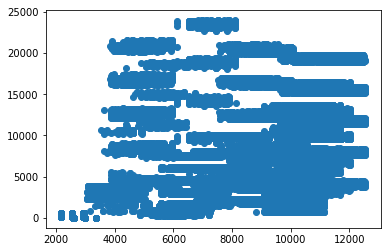

In [60]:
plt.scatter(y_pred,y_test)
plt.show()

In [61]:
fig =plt.figure()

In [62]:
fig.savefig('code.png')

In [63]:
ln.score(X_test, y_test)

0.12666029566052384

In [64]:
ln.score(X_train, y_train)

0.13003122189983729

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

4691.497369401297

In [66]:
r2_score(y_test, y_pred)

0.12666029566052384

In [67]:
ridge= Ridge()

In [68]:
ridge.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid={'alpha': [0.001,0.01,0.1,1,10]}

In [71]:
cv = GridSearchCV(ridge, param_grid)

In [72]:
cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [73]:
y_pred = cv.predict(X_test)

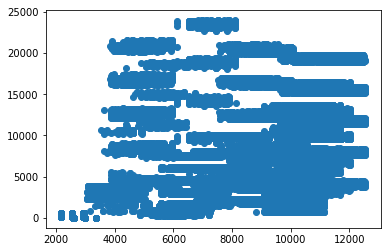

In [74]:
plt.scatter(y_pred,y_test)
plt.show()

In [75]:
cv.score(X_test,y_test)

0.12666029647249999

In [76]:
r2_score(y_test, y_pred)

0.12666029647249999

In [77]:
random = RandomForestRegressor()

In [78]:
random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
y_pred= random.predict(X_test)

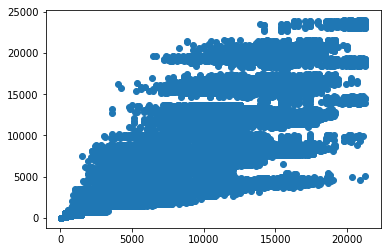

In [80]:
plt.scatter(y_pred,y_test)
plt.show()

In [81]:
random.score(X_test, y_test)

0.71153692502940435

In [82]:
r2_score(y_test, y_pred)

0.71153692502940435